<a href="https://colab.research.google.com/github/HiteshSamurai/Hitesh_Datahack/blob/main/Hitesh_Datahack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [574]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
train = pd.read_csv('training_set_features.csv')
test = pd.read_csv('test_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')
train.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


<Axes: >

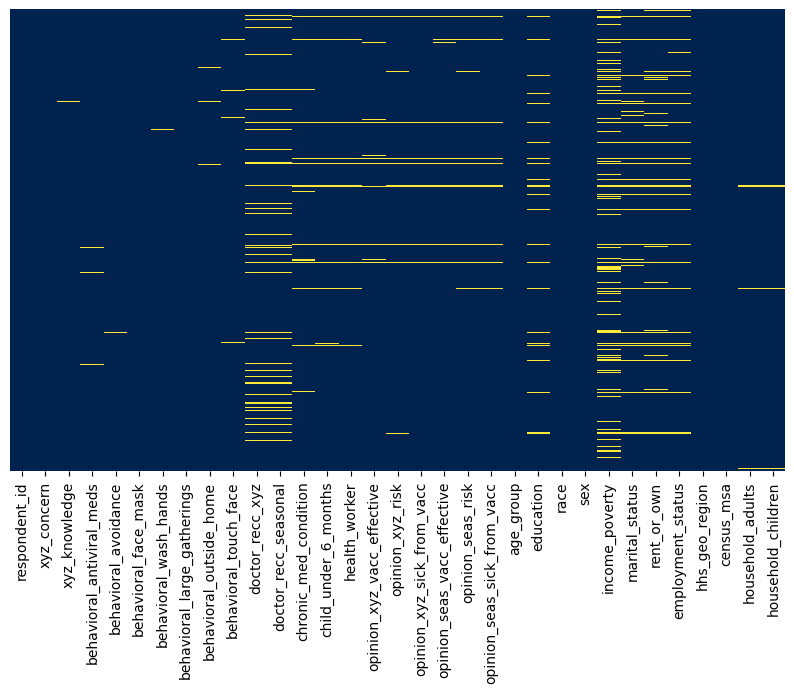

In [575]:
train = train.drop(columns=['employment_occupation','employment_industry','health_insurance'])
test = test.drop(columns=['employment_occupation','employment_industry','health_insurance'])
missing_data = train.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.heatmap(missing_data, cbar=False, cmap='cividis', yticklabels=False)

In [576]:
age_group_mapping = {
    '18 - 34 Years': 0,
    '35 - 44 Years': 1,
    '45 - 54 Years': 2,
    '55 - 64 Years': 3,
    '65+ Years': 4
}
income_poverty_mapping = {
    'Below Poverty':0, '<= $75,000, Above Poverty':1, '> $75,000':2
}


# Map the ordinal categories to numerical values in the DataFrame
train['age_group'] = train['age_group'].map(age_group_mapping)
train['age_group']
train['income_poverty']= train['income_poverty'].map(income_poverty_mapping)
train['income_poverty']


0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
26702    1.0
26703    1.0
26704    NaN
26705    1.0
26706    1.0
Name: income_poverty, Length: 26707, dtype: float64

In [577]:
train['education'].unique()
education_mapping={
    '< 12 Years':0, '12 Years':1, 'College Graduate':3, 'Some College':2
}
train['education']=train['education'].map(education_mapping)
train['education']
train['hhs_geo_region'].unique()
hhs_mapping = {
    'oxchjgsf':0, 'bhuqouqj':1, 'qufhixun':2, 'lrircsnp':3, 'atmpeygn':4,
       'lzgpxyit':5, 'fpwskwrf':6, 'mlyzmhmf':7, 'dqpwygqj':8, 'kbazzjca':9
}
train['hhs_geo_region']=train['hhs_geo_region'].map(hhs_mapping)
train['hhs_geo_region']
train['employment_status'].unique()
employment_mapping={
    'Not in Labor Force':0, 'Employed':2, 'Unemployed':1
}
train['employment_status']=train['employment_status'].map(employment_mapping)
train['employment_status']
train['census_msa'].unique()
census_mapping={
    'Non-MSA':0, 'MSA, Not Principle  City':1, 'MSA, Principle City':2
}
train['census_msa']=train['census_msa'].map(census_mapping)
train['census_msa']

0        0
1        1
2        1
3        2
4        1
        ..
26702    0
26703    2
26704    1
26705    0
26706    2
Name: census_msa, Length: 26707, dtype: int64

In [578]:
train['race'].unique()
race_mapping={'White':3, 'Black':0, 'Other or Multiple':2, 'Hispanic':1}
train['race']=train['race'].map(race_mapping)
train['race']
train['sex'].unique()
sex_mapping={'Female':1, 'Male':0}
train['sex']=train['sex'].map(sex_mapping)
train['sex']
train['marital_status'].unique()
martial_mapping={'Not Married':0, 'Married':1}
train['marital_status']=train['marital_status'].map(martial_mapping)
train['marital_status']
train['rent_or_own'].unique()
rent_mapping={'Rent':0, 'Own':1}
train['rent_or_own']=train['rent_or_own'].map(rent_mapping)
train['rent_or_own']

0        1.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
26702    1.0
26703    0.0
26704    1.0
26705    0.0
26706    1.0
Name: rent_or_own, Length: 26707, dtype: float64

In [579]:
# Map the ordinal categories to numerical values in the DataFrame
test['age_group'] = test['age_group'].map(age_group_mapping)
test['income_poverty']= test['income_poverty'].map(income_poverty_mapping)
test['education']=test['education'].map(education_mapping)
test['hhs_geo_region']=test['hhs_geo_region'].map(hhs_mapping)
test['employment_status']=test['employment_status'].map(employment_mapping)
test['census_msa']=test['census_msa'].map(census_mapping)
test['race']=test['race'].map(race_mapping)
test['sex']=test['sex'].map(sex_mapping)
test['marital_status']=test['marital_status'].map(martial_mapping)
test['rent_or_own']=test['rent_or_own'].map(rent_mapping)

In [580]:
train

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,1,0.0,0.0,1.0,0.0,0,0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,0,0.0,0.0,0.0,2.0,1,1,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,0,1.0,0.0,1.0,2.0,2,1,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,1,0.0,0.0,0.0,0.0,3,2,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,1,1.0,1.0,1.0,2.0,2,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,1,1.0,0.0,1.0,0.0,2,0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,0,1.0,0.0,0.0,2.0,5,2,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,3,1,NaN,0.0,1.0,NaN,5,1,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1,1,1.0,1.0,0.0,2.0,3,0,1.0,0.0


<Axes: >

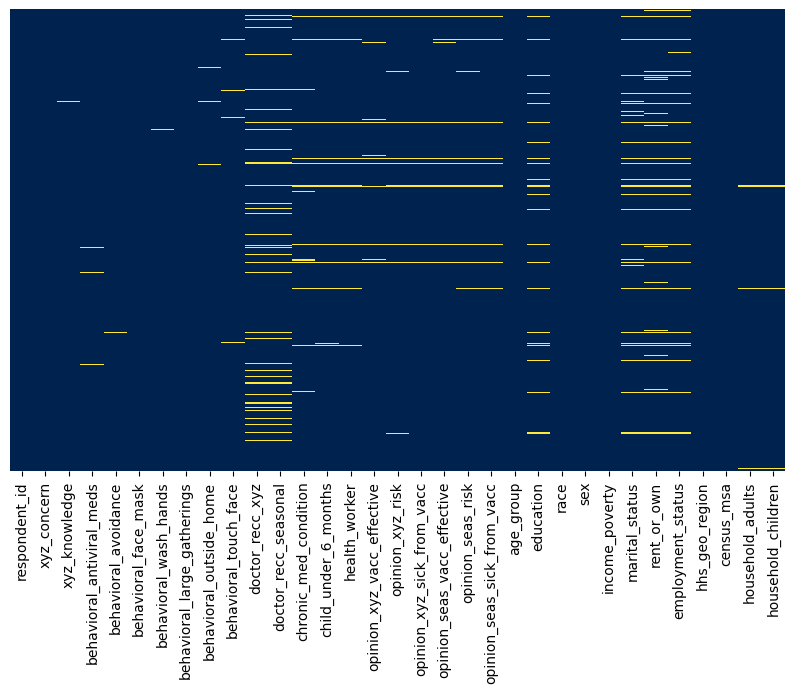

In [581]:
train['income_poverty'].fillna(train['income_poverty'].mode()[0], inplace=True)
missing_data = train.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.heatmap(missing_data, cbar=False, cmap='cividis', yticklabels=False)

In [582]:
value_counts = train['education'].value_counts(normalize=True)

# Ensure the probabilities sum to 1
assert np.isclose(value_counts.sum(), 1), "Probabilities do not sum to 1"

# Function to impute missing values using weighted random selection
def impute_education(row, value_counts):
    if pd.isna(row['education']):
        return np.random.choice(value_counts.index, p=value_counts.values)
    else:
        return row['education']

# Apply the function to impute missing values
train['education'] = train.apply(impute_education, axis=1, value_counts=value_counts)

train['education'].value_counts()

education
3.0    10653
2.0     7444
1.0     6125
0.0     2485
Name: count, dtype: int64

<Axes: >

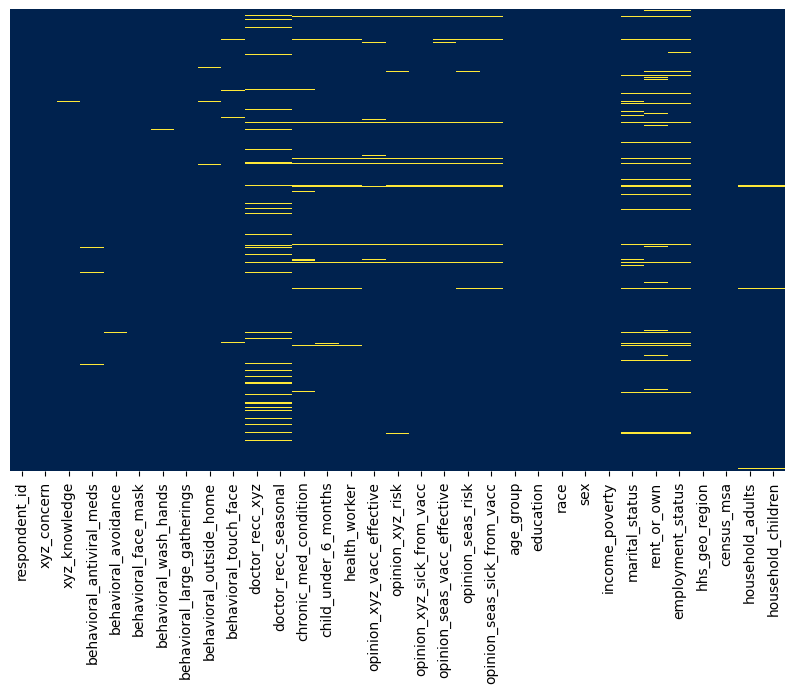

In [583]:
missing_data = train.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='cividis', yticklabels=False)

In [584]:
mode_doc_recc = train['doctor_recc_xyz'].mode()[0]
train['doctor_recc_xyz'].value_counts()

doctor_recc_xyz
0.0    19139
1.0     5408
Name: count, dtype: int64

<Axes: >

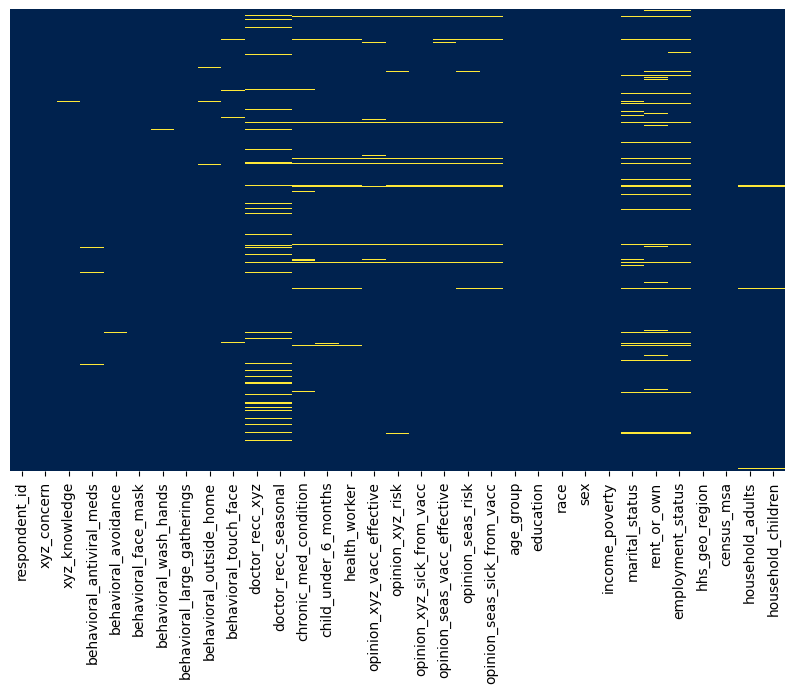

In [585]:
missing_data = train.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='cividis', yticklabels=False)

In [586]:
train['rent_or_own'].fillna(train['rent_or_own'].mode()[0],inplace=True)
train['employment_status'].fillna(train['employment_status'].mode()[0],inplace=True)

In [587]:
binary_columns = train.columns[train.nunique() <= 2]  # Identify binary columns

for col in binary_columns:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)


<Axes: >

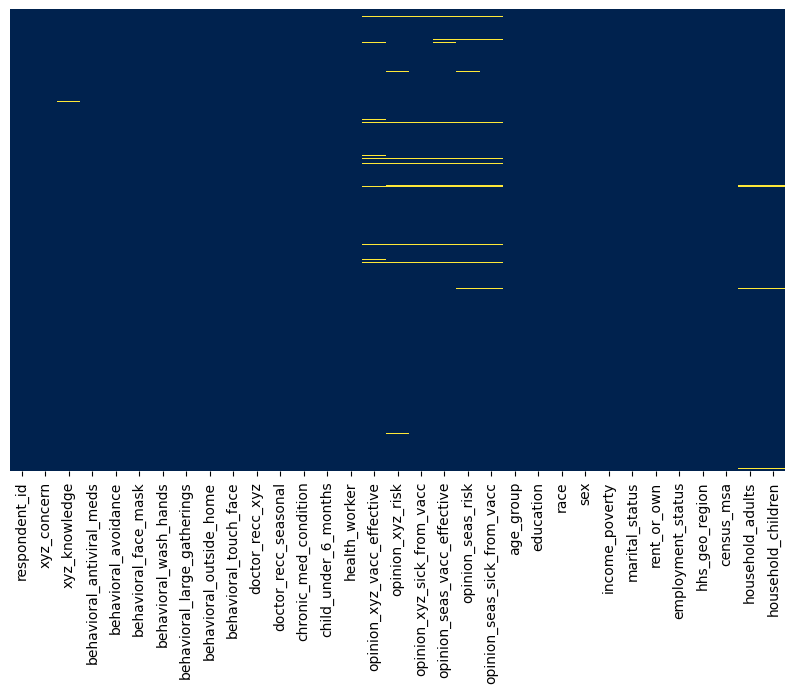

In [588]:
missing_data = train.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.heatmap(missing_data, cbar=False, cmap='cividis', yticklabels=False)

In [589]:
non_binary_numerical_columns = train.select_dtypes(include=np.number).columns

for col in non_binary_numerical_columns:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(test[col].median(), inplace=True)

print("\nDataFrame after filling missing values with median in non-binary numerical columns:")
print(train)


DataFrame after filling missing values with median in non-binary numerical columns:
       respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0                  0          1.0            0.0                        0.0   
1                  1          3.0            2.0                        0.0   
2                  2          1.0            1.0                        0.0   
3                  3          1.0            1.0                        0.0   
4                  4          2.0            1.0                        0.0   
...              ...          ...            ...                        ...   
26702          26702          2.0            0.0                        0.0   
26703          26703          1.0            2.0                        0.0   
26704          26704          2.0            2.0                        0.0   
26705          26705          1.0            1.0                        0.0   
26706          26706          0.0            0

<Axes: >

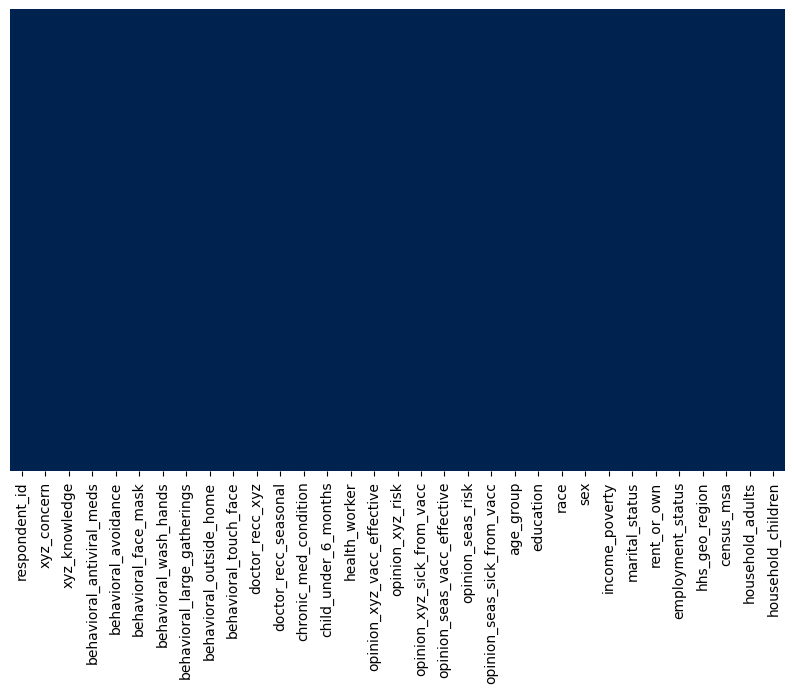

In [590]:
missing_data = test.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='cividis', yticklabels=False)

In [591]:
test

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,1,2.0,0.0,0.0,2.0,7,1,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0.0,0.0,0.0,2.0,1,0,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,3,0,2.0,1.0,1.0,2.0,3,0,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,1.0,1.0,1.0,0.0,3,1,1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,1,1.0,0.0,1.0,2.0,5,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,1,1.0,1.0,1.0,2.0,8,2,1.0,1.0
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,3,0,0.0,1.0,0.0,2.0,2,0,1.0,3.0
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0.0,0.0,0.0,0.0,2,1,1.0,0.0
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,3,1,1.0,1.0,1.0,0.0,1,1,1.0,0.0


In [592]:
correlation_matrix=train.corr()
correlation_matrix

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,1.000000,0.017896,0.003473,-0.008458,0.008912,-0.006654,0.011212,0.004455,0.009181,0.007606,...,-0.002298,-0.005169,-0.005869,0.003021,0.007372,-0.000112,0.002234,-0.000294,0.000172,-0.003650
xyz_concern,0.017896,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,...,-0.130248,0.127503,-0.057687,0.028045,-0.000714,-0.048362,0.036768,-0.007178,-0.016079,0.049441
xyz_knowledge,0.003473,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,...,0.150439,0.067567,0.229806,0.108783,0.108313,0.113236,-0.068010,0.035243,0.023866,0.053378
behavioral_antiviral_meds,-0.008458,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,...,-0.110963,0.006196,-0.068004,-0.005924,-0.056575,0.015390,0.035863,0.012411,0.044829,0.083090
behavioral_avoidance,0.008912,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,...,0.001699,0.112591,0.031342,0.045367,0.028909,-0.018341,0.008829,0.004631,0.017995,0.038977
behavioral_face_mask,-0.006654,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,...,-0.083075,0.049912,-0.062185,-0.001622,-0.043492,-0.028660,0.025173,0.021285,0.014191,0.004794
behavioral_wash_hands,0.011212,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,...,-0.065468,0.157033,0.009271,0.041226,0.017509,-0.011536,0.007713,-0.000532,0.009367,0.047451
behavioral_large_gatherings,0.004455,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,...,-0.108378,0.055871,-0.154419,-0.025476,-0.047477,-0.138073,0.046391,-0.042894,-0.030994,-0.009126
behavioral_outside_home,0.009181,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,...,-0.124640,0.039100,-0.171338,-0.024708,-0.063544,-0.138859,0.053288,-0.032730,-0.026542,-0.008937
behavioral_touch_face,0.007606,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,...,-0.056717,0.162693,-0.039224,0.027781,0.017302,-0.033718,0.006820,-0.021698,-0.001233,0.023739


In [594]:
threshold = 0.5


columns_to_drop = []
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j]) > threshold:
        columns_to_drop.append(correlation_matrix.columns[i])

print("Columns to Drop:", columns_to_drop)

train = train.drop(columns=columns_to_drop, axis=1)
test = test.drop(columns=columns_to_drop, axis=1)


Columns to Drop: ['behavioral_outside_home', 'doctor_recc_seasonal', 'opinion_seas_risk']


(array([ 2118.,     0.,     0.,  1755.,     0.,     0.,  1612.,     0.,
            0., 21222.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

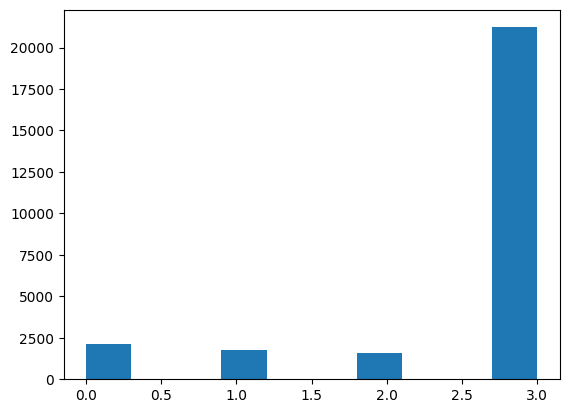

In [597]:
plt.hist(train['race'])

In [598]:
import scipy.stats as stats

In [599]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# train= scaler.fit_transform(train[['household_adults']])

In [600]:
model1 = LogisticRegression(max_iter=2000)
model2 = LogisticRegression(max_iter=2000)

# Train the models
model1.fit(train, labels['xyz_vaccine'])
model2.fit(train, labels['seasonal_vaccine'])

LogisticRegression(max_iter=2000)

In [605]:
y1_pred_proba = model1.predict_proba(test)[:, 1]
y2_pred_proba = model2.predict_proba(test)[:, 1]
# from sklearn.metrics import roc_auc_score, roc_curve
y1_pred_proba, y2_pred_proba

(array([0.09069   , 0.1072104 , 0.28818782, ..., 0.2478766 , 0.05021047,
        0.13952913]),
 array([0.35942658, 0.12633177, 0.59484549, ..., 0.2431002 , 0.55205969,
        0.31342838]))

In [611]:
df = pd.DataFrame({
    'respondent_id': test['respondent_id'],
    'xyz_vaccine': np.round(y1_pred_proba,1),
    'seasonal_vaccine': np.round(y2_pred_proba,1)
})
csv_file_path = r'\Desktop\predictions.csv'
df.to_csv(csv_file_path, index=False)